# 0.0 Import Bibs

In [6]:
import pandas as pd
import numpy as np
from sklearn import cluster as ct
from sklearn import metrics as mt
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 1.0 Load Data

In [2]:
x_data = pd.read_csv('../datasets/cluster/X_dataset_clu.csv')

In [3]:
x_data.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933
3,1.691550,0.239130,0.487926,-0.809251,0.930918,0.989655,0.664557,-0.981875,1.032155,1.186068,0.308943,0.798535,0.857347
4,0.295700,0.365613,1.840403,0.451946,1.281985,0.627586,0.495781,0.226796,0.401404,-0.319276,0.455285,0.608059,0.325963


# 2.0 Defs

In [7]:
def s_score(x, modelo):
    ss_avg = mt.silhouette_score(x, modelo)
    return ss_avg

# 3.0 Ensaio Machine Learning

## 1) K-Means

In [8]:
def k_means(k, x):
    kmeans = ct.KMeans(n_clusters=k, random_state=42)
    label = kmeans.fit_predict(x)
    return label

In [9]:
k = np.arange(2, 21, 1)
ss_list = []
wcss_list =[]
for i in range(len(k)):
    labels = k_means(k[i], x_data)
    silhouette_score = s_score(x_data, labels)
    ss_list.append(silhouette_score)
    k_ = ct.KMeans(n_clusters=k[i], random_state=42)
    wc_label = k_.fit(x_data)
    wcss_list.append(wc_label.inertia_)

Text(0.5, 1.0, 'Valor de Silhouette Score por n cluster')

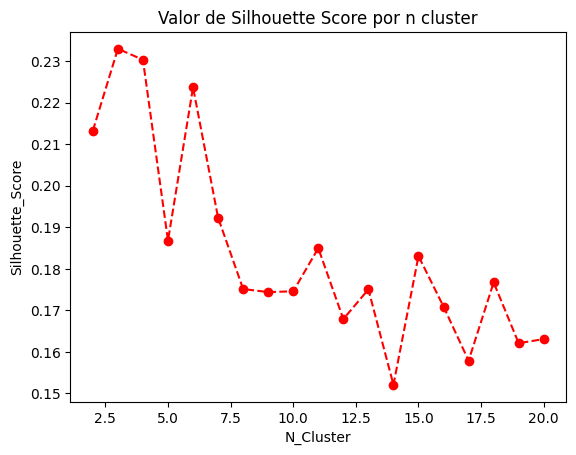

In [10]:
plt.plot(k, ss_list, 'ro--')
plt.xlabel('N_Cluster')
plt.ylabel('Silhouette_Score')
plt.title('Valor de Silhouette Score por n cluster')
        

In [11]:
ss_list

[0.213219480988304,
 0.23295918228054466,
 0.2303056525569282,
 0.18676549238556106,
 0.2236781175930215,
 0.1922717886677309,
 0.17509760540307095,
 0.17435725027940244,
 0.17455018419981466,
 0.18492782808187294,
 0.1678550901238871,
 0.1750107111228629,
 0.1520335196094671,
 0.18304192769888333,
 0.17086294152591353,
 0.15783356257199033,
 0.1766856766384127,
 0.16204115424933027,
 0.1630471508275129]

In [12]:
best_ss = ss_list.index(max(ss_list))
max_cluster = k[best_ss]
max_cluster

3

In [28]:
max_ss = ss_list[best_ss]
max_ss

0.12985791361298216

Text(0.5, 1.0, 'Valor de Inércia por n cluster')

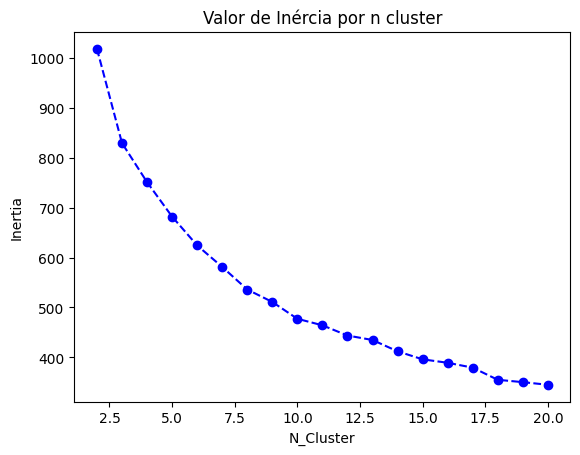

In [16]:
plt.plot(k, wcss_list, 'bo--')
plt.xlabel('N_Cluster')
plt.ylabel('Inertia')
plt.title('Valor de Inércia por n cluster')

In [17]:
wcss_list

[1017.8331070382167,
 829.0437911526398,
 750.8929680082839,
 681.8700839314022,
 624.2569149820317,
 581.1729872270377,
 535.9756168443398,
 511.06314292148164,
 477.3902387463819,
 464.3485353700595,
 443.8952673864428,
 434.9410918196942,
 412.2689286473501,
 396.2235787625839,
 389.34169958109055,
 379.60221634469906,
 355.26533460819036,
 350.5807322672148,
 345.29755306174263]

In [46]:
kmeans_tabela = pd.DataFrame({'Algoritmo': ['K_Means'],
                              'Clusters': [3],
                              'Silhouette_Score': [0.2329]})
kmeans_tabela

,Algoritmo,Clusters,Silhouette_Score
0,K_Means,3,0.2329


## 2)  Affinity Propagation

In [18]:
def affinity_propagation(p, x):
    model = ct.AffinityPropagation(preference = p)
    model.fit(x)
    label = model.predict(x)
    return label

In [19]:
p = np.arange(-1,-61, -1)
ss_list = []
n_cluster =[]
for i in range(len(p)):
    labels = affinity_propagation(p[i], x_data)
    n_cluster.append(labels)
    ss = s_score(x_data, labels)
    ss_list.append(ss)

Text(0.5, 1.0, 'Valor de Silhouette Score por n cluster')

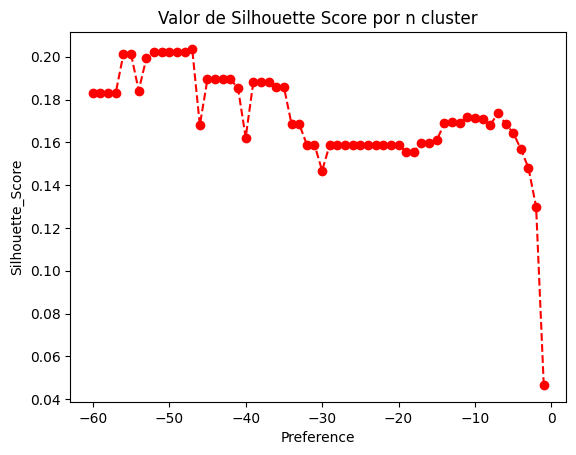

In [20]:
plt.plot(p, ss_list, 'ro--')
plt.xlabel('Preference')
plt.ylabel('Silhouette_Score')
plt.title('Valor de Silhouette Score por n cluster')

In [23]:
ss_best = ss_list.index(max(ss_list))
p_best = p[ss_best]
p_best

-47

In [49]:
best_ss = ss_list[ss_best]
best_ss

0.20365750456597356

In [56]:
best_cl = n_cluster[ss_best]
best_cl

array([1, 4, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 6, 0, 0, 6, 4, 0, 1, 0, 1, 1, 0, 0, 1, 0, 6, 4, 1, 1, 4, 1, 6,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 6, 6, 4, 4, 6, 3,
       4, 4, 6, 2, 6, 0, 4, 0, 4, 4, 4, 6, 2, 3, 4, 4, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 2, 0, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3,
       2, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 0, 3, 4, 3, 3, 3, 3, 3, 3, 6, 6,
       6, 6, 3, 5, 3, 3, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 0, 5, 0, 5,
       5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 0, 6, 5, 5, 5, 5, 5,
       5, 5])

In [57]:
qtd_cluster = len(set(best_cl))
qtd_cluster

7

In [58]:
aff_prop_tabela = pd.DataFrame({'Algoritmo': ['Affinity_Propagation'],
                                'Preference': [p_best],
                                'Clusters': [qtd_cluster],
                                'Silhouette_Score': [best_ss]})
aff_prop_tabela

,Algoritmo,Preference,Clusters,Silhouette_Score
0,Affinity_Propagation,-47,7,0.203658


In [53]:
set(n_cluster[46])

{0, 1, 2, 3, 4, 5, 6}